In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv("titanic.csv")

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
df.drop("Cabin",axis=1, inplace= True)

In [18]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [19]:
df.nunique()


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

<Axes: xlabel='Age'>

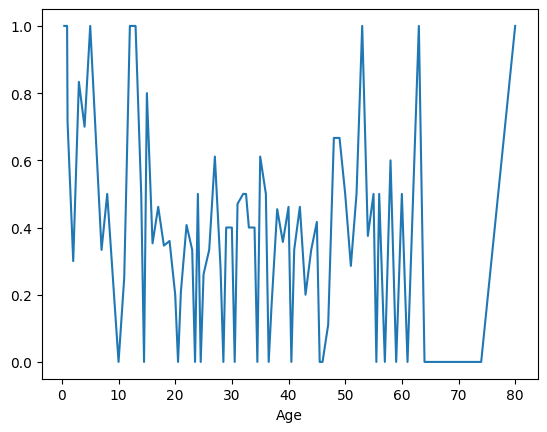

In [20]:
df.groupby('Age').Survived.mean().plot(kind='line')

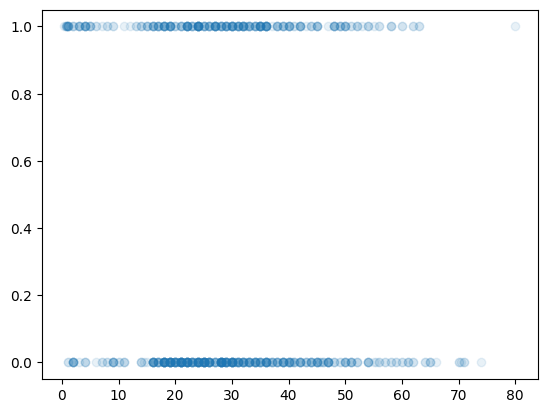

In [21]:
plt.scatter(x="Age", y="Survived", data=df, alpha=0.1)


In [22]:
df[(df["Age"] > 70 ) & (df["Survived"] == 1)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,S


### Survived Ratio

In [23]:
len(df[(df["Age"] < 20) & (df["Survived"] == 1)])

79

In [24]:
len(df[(df["Age"] < 20) & (df["Survived"] == 0)])

85

In [26]:
mort = round(len(df[(df["Age"] < 15) & (df["Survived"] == 1)]) / len(df[df["Age"] < 15])*100,2)
print("15 Age Below Survive Ratio: %", mort)

15 Age Below Survive Ratio: % 57.69


In [27]:
len(df[df["Survived"] == 1])

342

In [28]:
len(df[df["Survived"] == 0])

549

In [30]:
mort2 = round(len(df[df["Survived"] == 1]) / len(df["Survived"]),2)
print("Titanic Survived Ratio: %", mort2*100)

Titanic Survived Ratio: % 38.0


In [44]:
df = df.dropna()

In [45]:
print(len(df))
df.isna().sum()

712


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: xlabel='Age', ylabel='Pclass'>

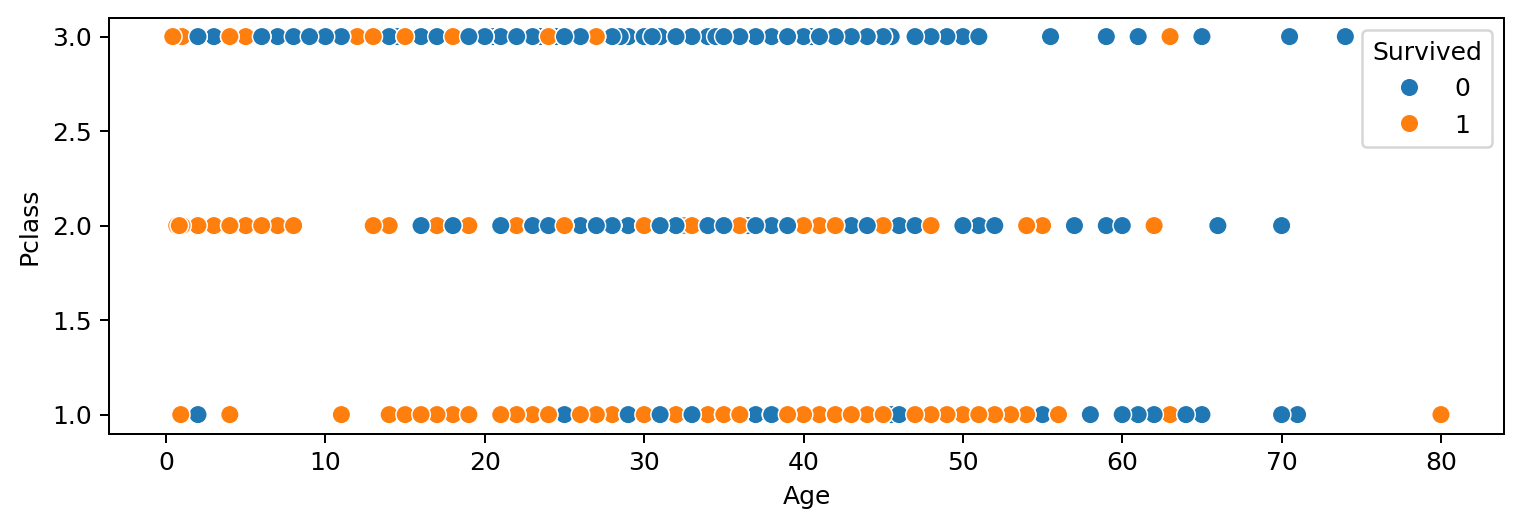

In [46]:
plt.figure(figsize=(10,3), dpi=180)
sns.scatterplot(x="Age", y="Pclass", data=df, hue="Survived", s=55)

In [47]:
df[["Pclass", "Survived"]].value_counts()

Pclass  Survived
3       0           270
1       1           120
2       0            90
3       1            85
2       1            83
1       0            64
Name: count, dtype: int64

In [48]:
df[["Pclass", "Survived"]].value_counts()

Pclass  Survived
3       0           270
1       1           120
2       0            90
3       1            85
2       1            83
1       0            64
Name: count, dtype: int64

In [49]:
poorPerson = len(df[(df["Pclass"] == 3) & (df["Survived"] == 1)]) / len(df[df["Pclass"] == 3])
print("Poor Person Survive Ratio: ", round(poorPerson,2))

Poor Person Survive Ratio:  0.24


In [50]:
richPerson = len(df[(df["Pclass"] == 1) & (df["Survived"] == 1)]) / len(df[df["Pclass"] == 1])
print("Rich Person Survive Ratio: ", round(richPerson,2))

Rich Person Survive Ratio:  0.65


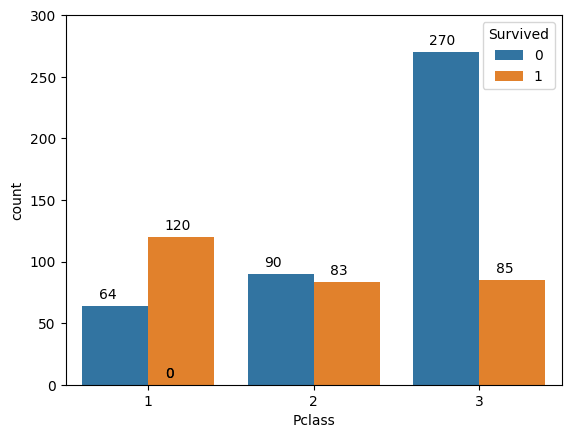

In [51]:
ax = sns.countplot(x="Pclass", data=df, hue="Survived")
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+6))
plt.ylim(0,300);

---
## Train Test Split

In [52]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X = df.drop(["PassengerId","Name","Ticket", "Survived"], axis=1)
X = pd.get_dummies(X, drop_first=True)

y = df["Survived"]

In [55]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,True,False,True
1,1,38.0,1,0,71.2833,False,False,False
2,3,26.0,0,0,7.9250,False,False,True
3,1,35.0,1,0,53.1000,False,False,True
4,3,35.0,0,0,8.0500,True,False,True


In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
    random_state=9, test_size= 0.2 )

In [60]:
y_train

434    0
614    0
811    0
657    0
735    0
      ..
74     1
635    1
802    1
436    0
480    0
Name: Survived, Length: 569, dtype: int64

---
## SVM Model

In [61]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [62]:
model = SVC()

C = 10. ** np.arange(-2,4)

parameters = {
    "C" : C,
    "kernel" : ["rbf", "poly"],
    "degree" : [2,3,4]
}

In [63]:
C

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [64]:
grid = GridSearchCV(model, parameters, cv=9)
grid.fit(X_train, y_train)

GridSearchCV(cv=9, estimator=SVC(),
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'degree': [2, 3, 4], 'kernel': ['rbf', 'poly']})

In [65]:
grid.best_params_


{'C': 1000.0, 'degree': 2, 'kernel': 'rbf'}

In [66]:
jack = grid.predict(X_test)

In [67]:
grid.best_score_

0.7927689594356261

In [68]:
from grid_plot import GridSearch_table_plot


best parameters: {'C': 1000.0, 'degree': 2, 'kernel': 'rbf'}
best score:      0.79277 (+/-0.03963)
{'C': 1000.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 2,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,mean_test_score,std_test_score,rank_test_score
32,0.018550,0.003273,0.001919,0.002251,1000.0,3,rbf,"{'C': 1000.0, 'degree': 3, 'kernel': 'rbf'}",0.750000,0.750000,0.793651,0.793651,0.857143,0.746032,0.857143,0.793651,0.793651,0.792769,0.039629,1
30,0.020662,0.006098,0.001273,0.000464,1000.0,2,rbf,"{'C': 1000.0, 'degree': 2, 'kernel': 'rbf'}",0.750000,0.750000,0.793651,0.793651,0.857143,0.746032,0.857143,0.793651,0.793651,0.792769,0.039629,1
34,0.017263,0.003128,0.000932,0.000015,1000.0,4,rbf,"{'C': 1000.0, 'degree': 4, 'kernel': 'rbf'}",0.750000,0.750000,0.793651,0.793651,0.857143,0.746032,0.857143,0.793651,0.793651,0.792769,0.039629,1
31,0.186368,0.150822,0.000964,0.000091,1000.0,2,poly,"{'C': 1000.0, 'degree': 2, 'kernel': 'poly'}",0.734375,0.812500,0.777778,0.761905,0.841270,0.761905,0.809524,0.809524,0.793651,0.789159,0.031138,4
28,0.004861,0.000340,0.001112,0.000160,100.0,4,rbf,"{'C': 100.0, 'degree': 4, 'kernel': 'rbf'}",0.750000,0.734375,0.777778,0.746032,0.873016,0.730159,0.888889,0.809524,0.761905,0.785742,0.055813,5
24,0.004725,0.000209,0.001032,0.000021,100.0,2,rbf,"{'C': 100.0, 'degree': 2, 'kernel': 'rbf'}",0.750000,0.734375,0.777778,0.746032,0.873016,0.730159,0.888889,0.809524,0.761905,0.785742,0.055813,5
26,0.004842,0.000247,0.001103,0.000062,100.0,3,rbf,"{'C': 100.0, 'degree': 3, 'kernel': 'rbf'}",0.750000,0.734375,0.777778,0.746032,0.873016,0.730159,0.888889,0.809524,0.761905,0.785742,0.055813,5
22,0.003989,0.000427,0.001169,0.000055,10.0,4,rbf,"{'C': 10.0, 'degree': 4, 'kernel': 'rbf'}",0.750000,0.687500,0.682540,0.730159,0.777778,0.587302,0.761905,0.761905,0.698413,0.715278,0.055963,8
20,0.003932,0.000172,0.001251,0.000129,10.0,3,rbf,"{'C': 10.0, 'degree': 3, 'kernel': 'rbf'}",0.750000,0.687500,0.682540,0.730159,0.777778,0.587302,0.761905,0.761905,0.698413,0.715278,0.055963,8
18,0.003973,0.000297,0.001265,0.000140,10.0,2,rbf,"{'C': 10.0, 'degree': 2, 'kernel': 'rbf'}",0.750000,0.687500,0.682540,0.730159,0.777778,0.587302,0.761905,0.761905,0.698413,0.715278,0.055963,8


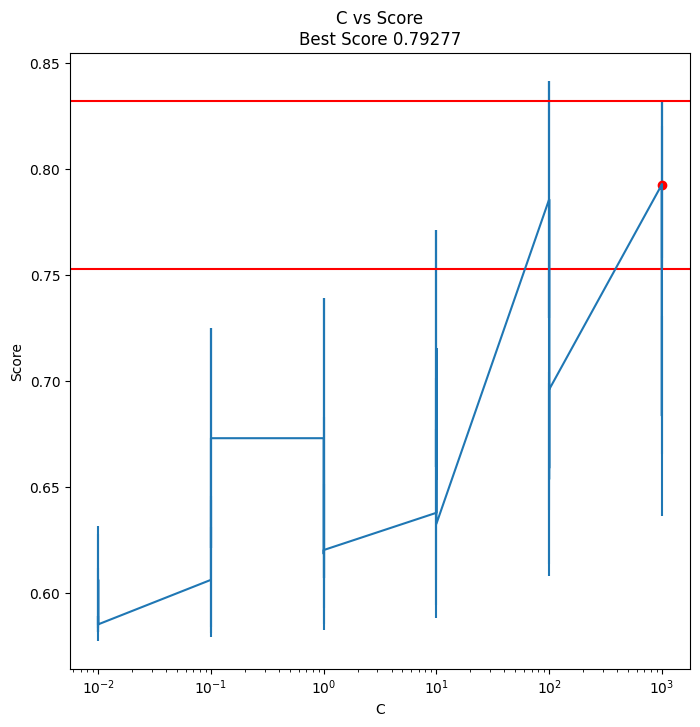

In [69]:
GridSearch_table_plot(grid, "C", negative=False)

In [71]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

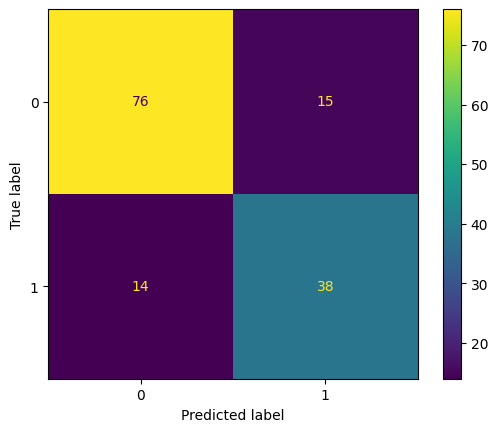

In [72]:
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test)

In [73]:
print(classification_report(y_test,jack))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        91
           1       0.72      0.73      0.72        52

    accuracy                           0.80       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.80      0.80      0.80       143

